## Projet 5 OpenClassrooms : Customer segmentation of a Brazilian e-commerce site

![](olist-gente-de-verdade.jpg)

## I- Project presentation
#### 1- Context 
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

#### 2- Inspiration
Here are some inspiration for possible outcomes from this dataset.
- NLP:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

- Clustering:
Some customers didn't write a review. But why are they happy or mad?

- Sales Prediction:
With purchase date information you'll be able to predict future sales.

- Delivery Performance:
You will also be able to work through delivery performance and find ways to optimize delivery times.

- Product Quality:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

- Feature Engineering:
Create features from this rich dataset or attach some external public information to it.


#### 3- Problem definition

Olist is a Brazilian company that offers a sales solution on online marketplaces.
Olist wants to provide its e-commerce teams with **customer segmentation** that they can use on a daily basis for their communication campaigns.


The aim is to understand the different types of users through their behavior and personal data.


From the analysis of the information, we try to answer the following questions:

- Who are these customers?
- How would you classify them?
- What would be a possible CRM (Customer Relationship Management) campaign strategy?

#### 4- About dataset
This is a Brazilian ecommerce public dataset of orders made at Olist Store available at Kaggle. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.

## II- Datasets understanding

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import datetime



# Dislay options
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 2000)

In [2]:
# loading dataset
df_customers = pd.read_csv ('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv ('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv ('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv ('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv ('olist_orders_dataset.csv')
df_products = pd.read_csv ('olist_products_dataset.csv')
df_sellers = pd.read_csv ('olist_sellers_dataset.csv')
df_categ_name_trans = pd.read_csv('product_category_name_translation.csv')

![](http://localhost:8889/view/DATA%20SCHEME.png)

### DataBase Management System (DBMS)
![](DATASCHEME.png)

In [3]:
#Creat a dictionnary of datasets
dict_df = {"df_customers": df_customers ,
           "df_geolocation": df_geolocation,
           "df_order_items": df_order_items,
           "df_order_payments": df_order_payments,
           "df_order_reviews": df_order_reviews,
           "df_orders": df_orders,
           "df_products": df_products,
           "df_categ_name_translation": df_categ_name_trans,
           "df_sellers": df_sellers
          }

In [4]:
#To display all datasets
for name_df , df in dict_df.items() :
    print ("***********",name_df,"**************")
    print ("the shape of", name_df, "is :", df.shape)
    display (df.head())

*********** df_customers **************
the shape of df_customers is : (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


*********** df_geolocation **************
the shape of df_geolocation is : (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


*********** df_order_items **************
the shape of df_order_items is : (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


*********** df_order_payments **************
the shape of df_order_payments is : (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


*********** df_order_reviews **************
the shape of df_order_reviews is : (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


*********** df_orders **************
the shape of df_orders is : (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


*********** df_products **************
the shape of df_products is : (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


*********** df_categ_name_translation **************
the shape of df_categ_name_translation is : (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


*********** df_sellers **************
the shape of df_sellers is : (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
df_orders[df_orders['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
71529,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00


In [6]:
df_order_items[df_order_items['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
60265,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21
60266,895ab968e7bb0d5659d16cd74cd1650c,2,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21
60267,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12


In [7]:
df_order_payments[df_order_payments['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4315,895ab968e7bb0d5659d16cd74cd1650c,17,voucher,1,16.70
9319,895ab968e7bb0d5659d16cd74cd1650c,1,voucher,1,2.61
19993,895ab968e7bb0d5659d16cd74cd1650c,13,voucher,1,16.70
21884,895ab968e7bb0d5659d16cd74cd1650c,16,voucher,1,16.70
29490,895ab968e7bb0d5659d16cd74cd1650c,19,voucher,1,0.24
41528,895ab968e7bb0d5659d16cd74cd1650c,4,voucher,1,2.61
46437,895ab968e7bb0d5659d16cd74cd1650c,21,voucher,1,0.28
52639,895ab968e7bb0d5659d16cd74cd1650c,2,voucher,1,2.61
53054,895ab968e7bb0d5659d16cd74cd1650c,12,voucher,1,16.70
56641,895ab968e7bb0d5659d16cd74cd1650c,18,voucher,1,1.31


In [8]:
# To describe different columns in all datasets
i=0
index_list = []
column_list = []
type_list = []
unique_list = []
shape_list = []

for name_df , df  in dict_df.items():
    for column in df.columns:
        index_list.append(name_df)
        column_list.append(column)
        type_list.append(df[column].dtype)
        unique_list.append(df[column].nunique())
        shape_list.append(df.shape)

resume_data = pd.DataFrame([index_list, 
                            column_list, 
                            type_list, 
                            unique_list,
                            shape_list]
                          ).T

resume_data.columns=['df_name', 'Column_name', 'Variables type', 'Unique_values', 'Data_shape']
resume_data

,df_name,Column_name,Variables type,Unique_values,Data_shape
0,df_customers,customer_id,object,99441,"(99441, 5)"
1,df_customers,customer_unique_id,object,96096,"(99441, 5)"
2,df_customers,customer_zip_code_prefix,int64,14994,"(99441, 5)"
3,df_customers,customer_city,object,4119,"(99441, 5)"
4,df_customers,customer_state,object,27,"(99441, 5)"
5,df_geolocation,geolocation_zip_code_prefix,int64,19015,"(1000163, 5)"
6,df_geolocation,geolocation_lat,float64,717360,"(1000163, 5)"
7,df_geolocation,geolocation_lng,float64,717613,"(1000163, 5)"
8,df_geolocation,geolocation_city,object,8011,"(1000163, 5)"
9,df_geolocation,geolocation_state,object,27,"(1000163, 5)"


##### Attention
- customer_id and customer_unique_id have different values in df-customers.
- No duplicates in customer_id and order-id in both datas df_customers and df_orders.
- customer_state, payment_type, review_score, order_status, product_category_name, etc could be categorized.
-  there are 2 product_category_name which are not translated in english (71 in df_categ_name_translation vs 73 in df_products).
- To put in date format : shipping_limit_date, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.
- order_id and customer_id have the same number (99441)contient autant de valeurs que dans order.





## III- Variables understanding

In [9]:
print("\n- ".join(df_customers.columns))

customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state


**1- id variables :** 

- customer_id : key to the orders dataset and customer dataset. Each order has a unique customer_id.
- customer_unique_id : unique identifier of a customer.
- order_id : unique identifier of the order.
- order_item_id : sequential number identifying number of items included in the same order.
- product_id : product unique identifier
- seller_id : seller unique identifier
- review_id : unique review identifier

**2- Date variables :**
- shipping_limit_date : Shows the seller shipping limit date for handling the order over to the logistic partner.
- order_purchase_timestamp : Shows the purchase timestamp.
- order_approved_at : Shows the payment approval timestamp.
- order_delivered_carrier_date : Shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date : Shows the actual order delivery date to the customer.
- order_estimated_delivery_date : Shows the estimated delivery date that was informed to customer at the purchase moment.
- review_creation_date : Shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp : Shows satisfaction survey answer timestamp.

**3- Customers variables :**
- customer_zip_code_prefix : first five digits of customer zip code
- customer_city : customer city name
- customer_state : customer state

**4- Payment variables :**
- price : item price
- freight_value : item freight value item (if an order has more than one item the freight value is splitted between items)
- payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type : method of payment chosen by the customer.
- payment_installments : number of installments chosen by the customer.
- payment_value : transaction value.

**5- Order variables :**
- order_status : Reference to the order status (delivered, shipped, etc).

**6- Product variables :**
- product_category_name : root category of product, in Portuguese.
- product_category_name_english : category name in English
- product_name_lenght : number of characters extracted from the product name.
- product_description_lenght : number of characters extracted from the product description.
- product_photos_qty : number of product published photos.
- product_weight_g : product weight measured in grams.
- product_length_cm : product length measured in centimeters.
- product_height_cm : product height measured in centimeters.
- product_width_cm : product width measured in centimeters.

**7- Review variables :**
- review_score : Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title : Comment title from the review left by the customer, in Portuguese.
- review_comment_message : Comment message from the review left by the customer, in Portuguese.

**8- Seller variables :**
- seller_zip_code_prefix : first 5 digits of seller zip code.
- seller_city : seller city name.
- seller_state : seller state.


## IV- EDA for different datasets

### 1- Products and category datasets

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
df_categ_name_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [12]:
#To merge products data with category name traslation 
df_products = pd.merge(df_products, df_categ_name_trans, on = 'product_category_name')

#To drop "product_category_name" column
df_products.drop(columns = "product_category_name", inplace = True)

#To rename category column
df_products.rename(columns={'product_category_name_english': 'product_category'}, inplace = True)

In [13]:
#In our study, we don't need product caracteristics such as length, weight...We will remove these columns.
caracteristic_features = ['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']
df_products.drop(columns = caracteristic_features, axis=1, inplace=True)
df_products

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


<AxesSubplot:xlabel='count', ylabel='product_category'>

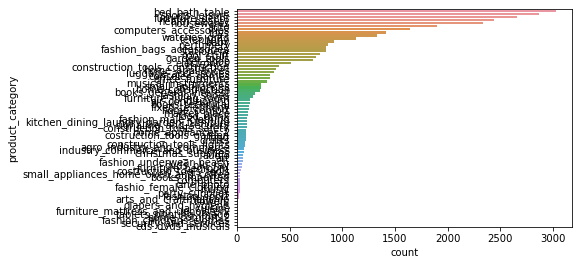

In [14]:
#To plot different categories
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10,25)
sns.countplot(data = df_products, y="product_category", order = df_products['product_category'].value_counts().index,
              orient='h')

the dataset has greater than 70 different categories. We will group several subcategories into a higher level category.
we will classify manually the products differently. For this, we will base ourselves on the main categories of online sales sites in 2017, available on this link https://www.statista.com/statistics/311406/us-online-shopping-categories-gender/:

- Fashion, clothing and accessories
- Health & Beauty
- Toys and baby equipment
- Books, CDs and other physical media
- Groceries, food and drink
- Technology (including phones and computers)
- Home and furniture
- Flowers and gifts
- sport & leisure
- arts
- Other 

In [15]:
#Category assemblage

df_products['product_category'] = np.where((df_products['product_category'].str.contains("fashio|luggage")==True),
                                    'Fashion, clothing and accessories',
                                  np.where((df_products['product_category'].str.contains("health|beauty|perfum")==True),
                                    'Health & Beauty',
                                  np.where((df_products['product_category'].str.contains("toy|baby|diaper")==True),
                                     'Toys and baby',
                                  np.where((df_products['product_category'].str.contains("book|cd|dvd|media")==True),
                                     'Books, cds & media',
                                  np.where((df_products['product_category'].str.contains("grocer|food|drink")==True), 
                                     'Groceries, food & drink',
                                  np.where((df_products['product_category'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'Technology',
                                  np.where((df_products['product_category'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'Home & furniture',
                                  np.where((df_products['product_category'].str.contains("flow|gift|stuff")==True),
                                     'Flowers_gifts',
                                  np.where((df_products['product_category'].str.contains("sport")==True),
                                     'Sport & leisure',
                                     'other')))))))))

<AxesSubplot:xlabel='count', ylabel='product_category'>

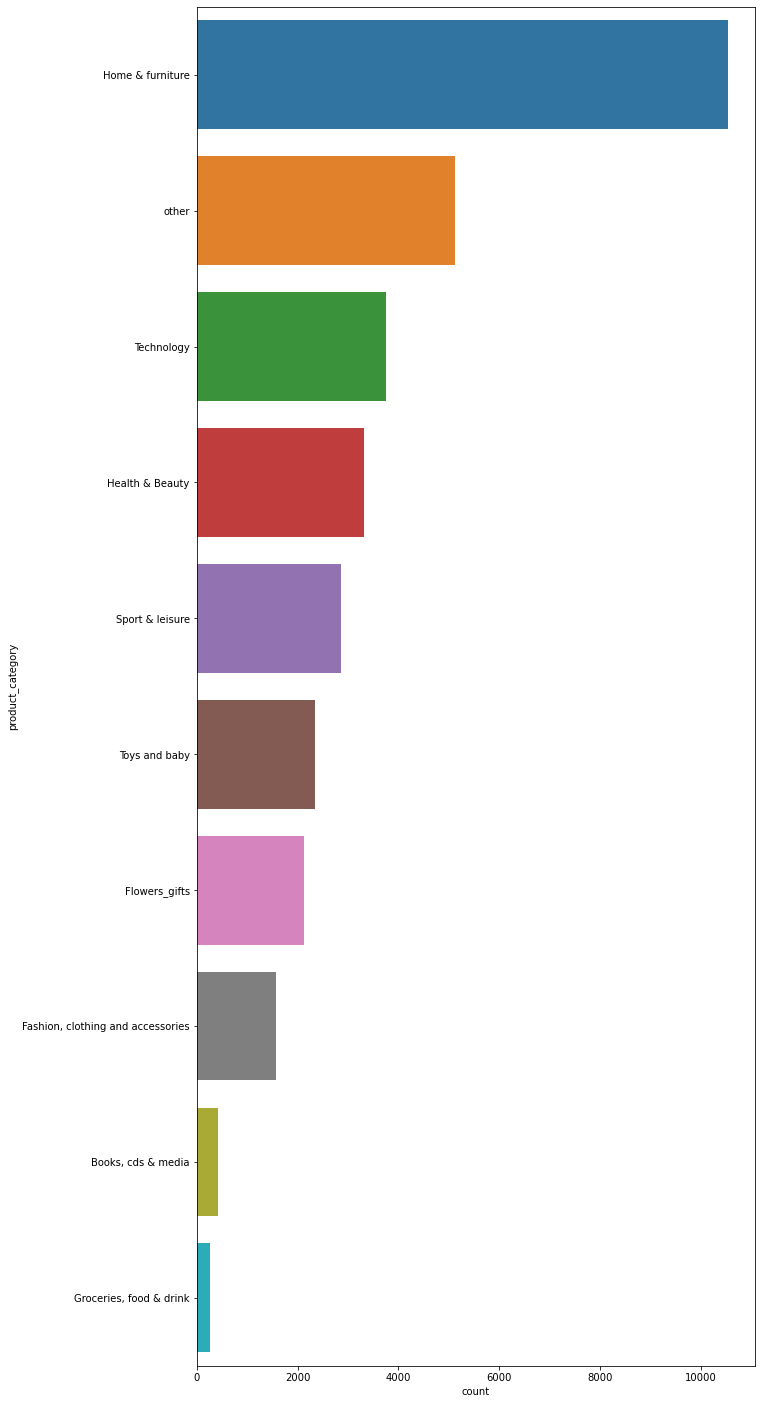

In [16]:
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8,8)
sns.countplot(data = df_products, y="product_category", order = df_products['product_category'].value_counts().index,
              orient='h')

### 2- Order datasets

In the following step , we will try to explore the 4 datas related to order which are :
- df_order_items
- df_order_payments
- df_order_reviews
- df_orders

In [17]:
#To create a dictionnary of all data related to orders
list_orders_dict = {
            "df_orders": df_orders, 
            "df_order_items": df_order_items,
            "df_order_payments": df_order_payments,
            "df_order_reviews": df_order_reviews
                   }

for name_df, df in list_orders_dict.items(): 
    print ("the shape of {} is {}".format(name_df, df.shape))
    print (name_df, "has {} unique values".format(df["order_id"].nunique()))
    display(df["order_id"].value_counts())
    print("_____________________________________________________________________\n")



the shape of df_orders is (99441, 8)
df_orders has 99441 unique values


8d4defaad3d1206dde5189a813b794f2    1
9bd2f19fdebcf5928f0971caeac464d9    1
7344c860833e7ea5b676e4575b225d6c    1
ab588e77cdbcc3d63e479ba2862256a5    1
4de6d713d9ceeaea4bc2e26389fd8c66    1
                                   ..
a9fc49d2e84da72c75e2fdb6311a221c    1
6aeda8ba5566fca8c69d83795b172e2d    1
36d43d9ea16e2435752ad9dd52850b73    1
05ebeda0c1aefd787e0ddc914af75039    1
0e43d3e03f2ae293fc9e34a0ef9a24eb    1
Name: order_id, Length: 99441, dtype: int64

_____________________________________________________________________

the shape of df_order_items is (112650, 7)
df_order_items has 98666 unique values


8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
ffaabba06c9d293a3c614e0515ddbabc     1
2861bde48c258a06a5ded52e540dc6be     1
bddc45d741b0d84cbed088e1f1d47a81     1
b465b096e042571f13c2e9e8e15122a5     1
0e43d3e03f2ae293fc9e34a0ef9a24eb     1
Name: order_id, Length: 98666, dtype: int64

_____________________________________________________________________

the shape of df_order_payments is (103886, 5)
df_order_payments has 99440 unique values


fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
d9926cee93b8e76d736ca514364a713a     1
a2abb866736a7dbc26c5cbb3b2d92826     1
fba03e479515f8c1325bb25a8704418c     1
fdf6635fc014c7f771754eefe24ff684     1
0e43d3e03f2ae293fc9e34a0ef9a24eb     1
Name: order_id, Length: 99440, dtype: int64

_____________________________________________________________________

the shape of df_order_reviews is (99224, 7)
df_order_reviews has 98673 unique values


8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
d310bd7091e28dd1dd215b1aae78f9f5    1
612200d1732f963c7706d8da2517c04d    1
e5e1c16f3df58122b4b4c212ff8a9439    1
e6602e10c88f7439767c3edfac0b00d5    1
498fddb261b6ddd5974cf8bea3374388    1
Name: order_id, Length: 98673, dtype: int64

_____________________________________________________________________



**Analysis:**
in df_orders, there is no duplicated order_id. Each row represent a single order. However, we have repeated order_id in the other datas. It could be due to the fact that : 
- One order can contains many items.
- A customer may pay an order with more than one payment method. He can choose a number of installments.
- An order can have many unique review identifier.

Let's see these examples

In [18]:
#Examples of order with one item and multiple items
display(df_order_items[df_order_items['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352'])#one item
df_order_items[df_order_items['order_id'] == '04993613aee4046caf92ea17b316dcfb']#differnet items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
2032,04993613aee4046caf92ea17b316dcfb,1,96d1c06692244e2fed6e1f9aa9552770,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,62.0,10.54
2033,04993613aee4046caf92ea17b316dcfb,2,96d1c06692244e2fed6e1f9aa9552770,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,62.0,10.54
2034,04993613aee4046caf92ea17b316dcfb,3,96d1c06692244e2fed6e1f9aa9552770,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,62.0,10.54
2035,04993613aee4046caf92ea17b316dcfb,4,078e8db43688ea060cf754e7bd2b92e7,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,48.0,10.54
2036,04993613aee4046caf92ea17b316dcfb,5,078e8db43688ea060cf754e7bd2b92e7,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,48.0,10.54
2037,04993613aee4046caf92ea17b316dcfb,6,078e8db43688ea060cf754e7bd2b92e7,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,48.0,10.54
2038,04993613aee4046caf92ea17b316dcfb,7,078e8db43688ea060cf754e7bd2b92e7,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,48.0,10.54
2039,04993613aee4046caf92ea17b316dcfb,8,96d1c06692244e2fed6e1f9aa9552770,00ee68308b45bc5e2660cd833c3f81cc,2018-02-07 02:52:44,62.0,10.54


In [19]:
#Examples of order with one payment_installments and various payment_installments
display(df_order_payments[df_order_payments['order_id'] == '04993613aee4046caf92ea17b316dcfb'])#one payment_installments
df_order_payments[df_order_payments['order_id'] == '65d304f392228e0b497f19d67ac76d90'].sort_values(by="payment_sequential") #various payment_installments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
76052,04993613aee4046caf92ea17b316dcfb,1,boleto,1,524.28


,order_id,payment_sequential,payment_type,payment_installments,payment_value
14671,65d304f392228e0b497f19d67ac76d90,1,credit_card,1,11.79
33877,65d304f392228e0b497f19d67ac76d90,2,voucher,1,22.23
36275,65d304f392228e0b497f19d67ac76d90,3,voucher,1,14.41
69290,65d304f392228e0b497f19d67ac76d90,4,voucher,1,0.22
39195,65d304f392228e0b497f19d67ac76d90,5,voucher,1,22.23
6216,65d304f392228e0b497f19d67ac76d90,6,voucher,1,22.23


In [20]:
#Examples of order with various review_score
df_order_reviews[df_order_reviews['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


###### a- df_orders

In [21]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
# To drop useless features in df_orders
useless_column = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_orders.drop(columns=useless_column , axis=1, inplace=True)

In [23]:
# To correct variables types
# To create a list of time variables
time_vars = ['order_purchase_timestamp', 'order_delivered_customer_date']
# Convert from object to datetime
for var in time_vars : 
    df_orders[var] = pd.to_datetime(df_orders[var] , format = "%Y/%m/%d %H:%M:%S")
df_orders.dtypes.value_counts()

object            3
datetime64[ns]    2
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'delivered'),
  Text(0, 1, 'shipped'),
  Text(0, 2, 'canceled'),
  Text(0, 3, 'unavailable'),
  Text(0, 4, 'invoiced'),
  Text(0, 5, 'processing'),
  Text(0, 6, 'created'),
  Text(0, 7, 'approved')])

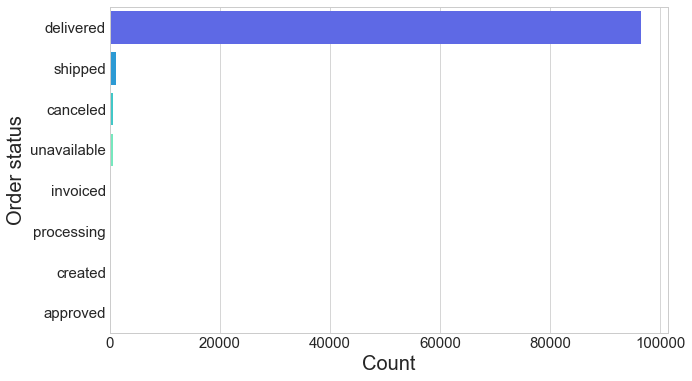

In [24]:
#To display order status
plt.figure(figsize = (10,6))
plt.style.use('seaborn-whitegrid')
sns.countplot(data = df_orders, y="order_status", order = df_orders['order_status'].value_counts().index,
              orient='h', palette='rainbow')
plt.xlabel('Count', size=20)
plt.ylabel('Order status', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

In [25]:
# We keep just delivered orders. for other orders, we have no "order_delivered_customer_date"
df_orders = df_orders[df_orders["order_status"] == "delivered"]

# To drop "order_status" column because all of them are delivered
df_orders.drop(labels="order_status", inplace=True, axis=1)

In [26]:
#To create new time variables (day, month and year)
df_orders['day'] = df_orders['order_purchase_timestamp'].dt.day_name()
df_orders['month'] = df_orders['order_purchase_timestamp'].dt.strftime("%B") 
df_orders['year'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['hour'] = df_orders['order_purchase_timestamp'].dt.hour
df_orders

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,day,month,year,hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,Monday,October,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,Tuesday,July,2018,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,Wednesday,August,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,Saturday,November,2017,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,Tuesday,February,2018,21
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,Thursday,March,2017,9
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,Tuesday,February,2018,12
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,Sunday,August,2017,14
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,Monday,January,2018,21


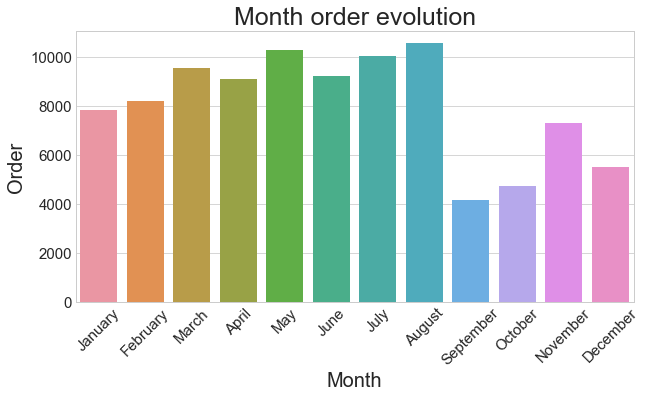

In [125]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sort_month = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
month_evolution = df_orders.groupby('month').agg({'order_id':'count'}).reindex(sort_month).reset_index()
sns.barplot(x = month_evolution['month'], y = month_evolution['order_id'])
plt.xlabel('Month', size=20)
plt.ylabel("Order", size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)

plt.title('Month order evolution', size=25)            
plt.show()

In [127]:
df_orders['day'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Sunday', 'Thursday',
       'Friday'], dtype=object)

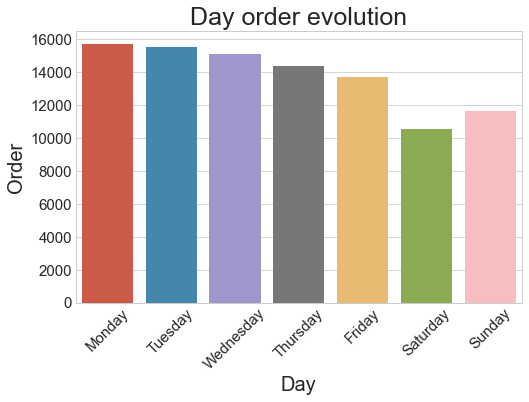

In [129]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,5))
sort_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
day_evolution = df_orders.groupby('day').agg({'order_id':'count'}).reindex(sort_days).reset_index()
sns.barplot(x = day_evolution['day'], y = day_evolution['order_id'])
plt.xlabel('Day', size=20)
plt.ylabel("Order", size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)

plt.title('Day order evolution', size=25)            
plt.show()

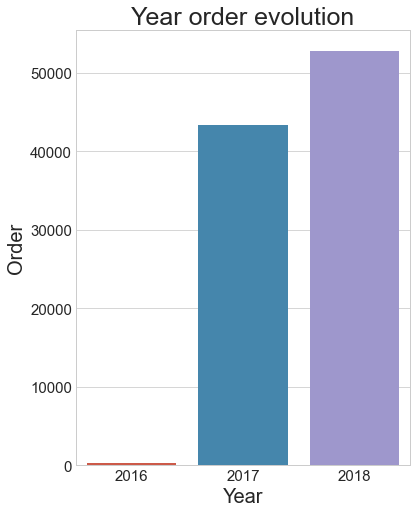

In [131]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,8))
year_evolution = df_orders.groupby('year').agg({'order_id':'count'}).reset_index()
sns.barplot(x = year_evolution['year'], y = year_evolution['order_id'])
plt.xlabel('Year', size=20)
plt.ylabel("Order", size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.title('Year order evolution', size=25)            
plt.show()

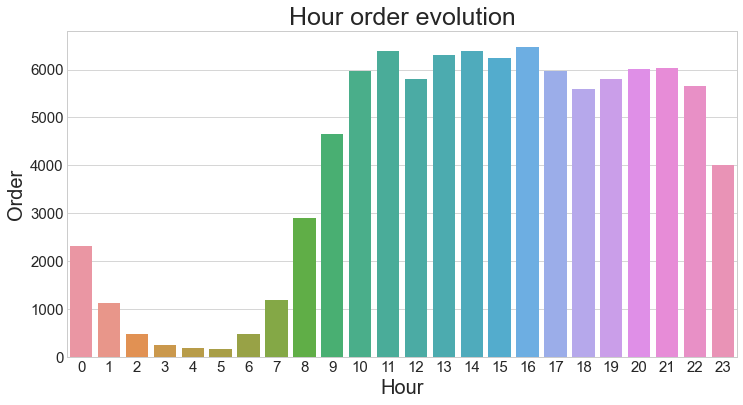

In [132]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))
hour_evolution = df_orders.groupby('hour').agg({'order_id':'count'}).reset_index()
sns.barplot(x = hour_evolution['hour'], y = hour_evolution['order_id'])
plt.xlabel('Hour', size=20)
plt.ylabel("Order", size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.title('Hour order evolution', size=25)            
plt.show()

In [28]:
###### b- df_orders_items

In [29]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
df_order_items.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.000000,1.197834,0.705124,1.000000,1.000000,1.000000,1.000000,21.000000
price,112650.000000,120.653739,183.633928,0.850000,39.900000,74.990000,134.900000,6735.000000
freight_value,112650.000000,19.990320,15.806405,0.000000,13.080000,16.260000,21.150000,409.680000


In [31]:
# To drop Useless features in df_order_items
df_order_items.drop(columns=['seller_id','shipping_limit_date'], inplace=True)

###### c- df_orders_payment

In [32]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [33]:
df_order_payments.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.000000,1.092679,0.706584,1.000000,1.000000,1.000000,1.000000,29.000000
payment_installments,103886.000000,2.853349,2.687051,0.000000,1.000000,1.000000,4.000000,24.000000
payment_value,103886.000000,154.100380,217.494064,0.000000,56.790000,100.000000,171.837500,13664.080000


In [34]:
# To show rows with zero number of installement
df_order_payments[df_order_payments['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


'number of installement' could not be 0, at least it is equal to 1. However, a customer may not have freight cost.**????**

In [35]:
df_order_payments['payment_installments'] = np.where(df_order_payments['payment_installments']==0, 1, 
                                                     df_order_payments['payment_installments'])

Text(0.5, 1.0, 'payment_type')

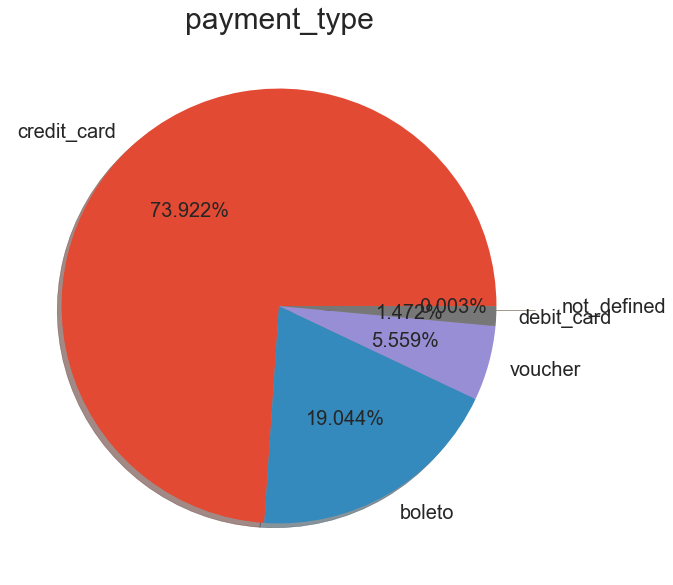

In [133]:
fig,ax = plt.subplots (figsize = (10,10))
ax.pie(df_order_payments['payment_type'].value_counts(), labels = df_order_payments['payment_type'].unique() ,
       explode = [0, 0, 0, 0, 0.2], autopct ='%1.3f%%' , shadow=True , textprops={'fontsize': 20})  
plt.title ('payment_type' , size= 30)

###### d- df_order_reviewx

In [37]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Text(0.5, 1.0, 'review_score')

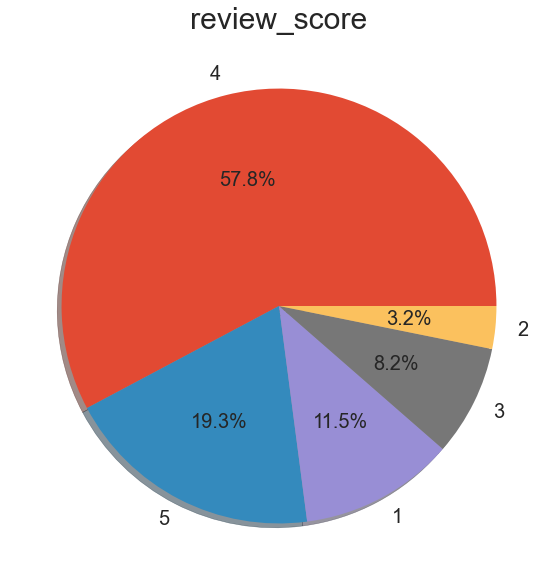

In [38]:
fig,ax = plt.subplots (figsize = (10,10))
ax.pie(df_order_reviews['review_score'].value_counts(), labels = df_order_reviews['review_score'].unique() ,
autopct ='%1.1f%%' , shadow=True , textprops={'fontsize': 20})  
plt.title ('review_score' , size= 30)

### 3- Customers datasets

In [39]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [40]:
df_customers.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.000000,35137.474583,29797.938996,1003.000000,11347.000000,24416.000000,58900.000000,99990.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'SP'),
  Text(0, 1, 'RJ'),
  Text(0, 2, 'MG'),
  Text(0, 3, 'RS'),
  Text(0, 4, 'PR'),
  Text(0, 5, 'SC'),
  Text(0, 6, 'BA'),
  Text(0, 7, 'DF'),
  Text(0, 8, 'ES'),
  Text(0, 9, 'GO'),
  Text(0, 10, 'PE'),
  Text(0, 11, 'CE'),
  Text(0, 12, 'PA'),
  Text(0, 13, 'MT'),
  Text(0, 14, 'MA'),
  Text(0, 15, 'MS'),
  Text(0, 16, 'PB'),
  Text(0, 17, 'PI'),
  Text(0, 18, 'RN'),
  Text(0, 19, 'AL'),
  Text(0, 20, 'SE'),
  Text(0, 21, 'TO'),
  Text(0, 22, 'RO'),
  Text(0, 23, 'AM'),
  Text(0, 24, 'AC'),
  Text(0, 25, 'AP'),
  Text(0, 26, 'RR')])

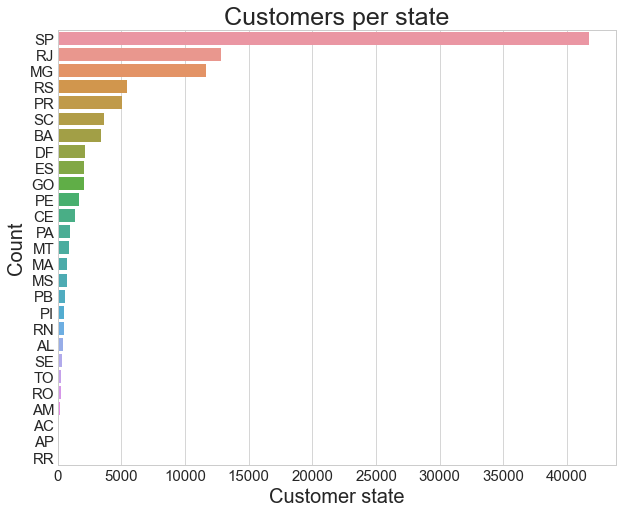

In [136]:
# Plot categories count in dataset
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(data = df_customers, y="customer_state", order = df_customers['customer_state'].value_counts().index,
              orient='h')
plt.title('Customers per state', size=25)
plt.xlabel('Customer state', size=20)
plt.xticks(size=15)
plt.ylabel('Count', size=20)
plt.yticks(size=15)

## IV- Merging datasets

As shown in the DBMS, the datasets that used in this project, can be ***merged***. Creating one dataset which includes all the columns would be very efficient in this task.


Our goal is to understand different types of customers through their behavior and personal data. That is why sellers data ~~**"df_sellers"**~~is not interesting for our study. Furthermore, we have necessary information about customers location in **df_customers** data, so ~~**df_geolocation**~~ is no longer needed.

In [42]:
total_order_payment = pd.DataFrame (data=df_order_payments.groupby("order_id").agg({'payment_sequential':'count',
                                                                                    'payment_installments':'sum',
                                                                                    }).reset_index())
total_order_payment.rename(columns={'payment_sequential':'sequential_number','payment_installments':'installement_number'},
                           inplace=True)

total_order_payment

,order_id,sequential_number,installement_number
0,00010242fe8c5a6d1ba2dd792cb16214,1,2
1,00018f77f2f0320c557190d7a144bdd3,1,3
2,000229ec398224ef6ca0657da4fc703e,1,5
3,00024acbcdf0a6daa1e931b038114c75,1,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3
...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1
99436,fffcd46ef2263f404302a634eb57f7eb,1,1
99437,fffce4705a9662cd70adb13d4a31832d,1,3
99438,fffe18544ffabc95dfada21779c9644f,1,3


In [43]:
total_order_payment[total_order_payment['order_id']=='65d304f392228e0b497f19d67ac76d90']

,order_id,sequential_number,installement_number
39506,65d304f392228e0b497f19d67ac76d90,6,6


In [44]:
grouped_order_review = pd.DataFrame (data=df_order_reviews.groupby(["order_id"])['review_score'].mean().reset_index())
grouped_order_review.rename({'review_score':'mean_review_score'}, axis=1, inplace=True)
grouped_order_review

,order_id,mean_review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5.0
98669,fffcd46ef2263f404302a634eb57f7eb,5.0
98670,fffce4705a9662cd70adb13d4a31832d,5.0
98671,fffe18544ffabc95dfada21779c9644f,5.0


In [45]:
#To merge all datas except sellers and geolocalisation
df = pd.merge (df_orders, df_order_items, on='order_id')
df = pd.merge (df, total_order_payment, on='order_id')
df = pd.merge (df, grouped_order_review, on='order_id')
df = pd.merge (df , df_customers, on = 'customer_id')
df = pd.merge (df , df_products, on = 'product_id')
df

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,day,month,year,hour,order_item_id,product_id,price,freight_value,sequential_number,installement_number,mean_review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,Monday,October,2017,10,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,3,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Home & furniture
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,Tuesday,August,2017,18,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,3,4.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,Home & furniture
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,2017-08-07 18:30:01,Wednesday,August,2017,18,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,1,5.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,Home & furniture
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,Monday,October,2017,23,1,87285b34884572647811a353c7ac498a,29.99,14.10,1,1,3.0,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,Home & furniture
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,Tuesday,July,2018,20,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1,1,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Health & Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107815,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,2017-08-23 15:36:29,Thursday,August,2017,21,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,10,4.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,Sport & leisure
107816,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,2017-08-23 15:36:29,Thursday,August,2017,21,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,10,4.0,fb9310710003399b031add3e55f34719,3318,sao paulo,SP,Sport & leisure
107817,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,2017-12-20 09:52:41,2018-01-26 15:45:14,Wednesday,December,2017,9,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,1,1,1.0,a49e8e11e850592fe685ae3c64b40eca,83870,campo do tenente,PR,other
107818,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,Thursday,March,2017,9,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,1,3,5.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,Health & Beauty


## VI- Feature engineering

Now that we have our extended dataset, we will center the data obtained on the customer and not on the orders by creating new variables. As we have seen previously, the customer's unique identifier is contained in the customer_unique_id variable.

we can segment customers according to several criteria


**Total features**
- Total product payment 
- Total freight payment
- Total turnover
- Freight ratio
- Total items
- Total orders


**Order features**
- order products mean price
- order freight mean price
- order mean turnover
- order mean items


**Item features**
- Item mean price


**Time**
- Order mean delivery delay (day)
- mean delay between orders
- recency : time since last purchase date


**Location feature**
- Distance haversine à olist
- customer_state??  

**Category features**
- Item ratio per category
- ratio price per category

**Other features**
- Mean score
- Order mean sequential number
- Order mean installement number
- Total products payment per month
- Total products payment per month



In [46]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'day', 'month', 'year', 'hour',
       'order_item_id', 'product_id', 'price', 'freight_value',
       'sequential_number', 'installement_number', 'mean_review_score',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category'],
      dtype='object')

In [47]:
#To calculate Total features
total_df = pd.DataFrame(data = df.groupby(['customer_unique_id'])\
                                 .agg({'order_id':'nunique',
                                       'order_item_id':'nunique',
                                       'price':'sum',
                                       'freight_value':'sum'})\
                                 .reset_index())
total_df.rename({'order_id':'total_orders',
                 'order_item_id':'total_item',
                 'price':'total_products_payment',
                 'freight_value':'total_freight_payment'}, inplace=True, axis=1)
total_df['total_turnover'] = total_df['total_products_payment'] + total_df['total_freight_payment']
total_df['freight_ratio'] = total_df['total_freight_payment'] / total_df['total_turnover']
total_df.sort_values(by='total_orders', ascending=False)

,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,total_turnover,freight_ratio
50414,8d50f5eadf50201ccdcedfb9e2ac8455,14,1,644.73,152.65,797.38,0.191439
22332,3e43e6105506432c953e165fb2acf44c,9,4,1000.85,171.82,1172.67,0.146520
72448,ca77025e7201e3b30c44b472ff346268,7,4,806.61,316.11,1122.72,0.281557
9871,1b6c7548a2a1f9037c1fd3ddfed95f33,7,2,809.21,149.80,959.01,0.156203
35983,6469f99c1f9dfae7733b25662e7f1782,7,2,664.20,94.63,758.83,0.124705
...,...,...,...,...,...,...,...
30922,564cb124d13d16afc61936ea12a17c33,1,1,70.44,8.72,79.16,0.110157
30921,564c03a40766b9b404572658fb74524d,1,1,152.00,15.94,167.94,0.094915
30920,564bc02acd888f7617b0d7c737d35aee,1,1,97.90,17.94,115.84,0.154869
30919,564b79621999c67280ca3374ab6e5f93,1,1,23.90,15.23,39.13,0.389215


In [48]:
df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'day', 'month', 'year', 'hour',
       'order_item_id', 'product_id', 'price', 'freight_value',
       'sequential_number', 'installement_number', 'mean_review_score',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category'],
      dtype='object')

In [49]:
#To calculate delivery delay for each order
df['delivery_delay(day)']= (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.round('1d').dt.days

In [50]:
#To calculate mean features
total_df['order_mean_item'] = total_df['total_item'] / total_df['total_orders']
total_df['order_products_mean_price'] = total_df['total_products_payment'] / total_df['total_orders']
total_df['order_freight_mean_price'] = total_df['total_freight_payment'] / total_df['total_orders']
total_df['order_mean_turnover'] = total_df['total_turnover'] / total_df['total_orders']
total_df['item_mean_price'] = total_df['total_products_payment'] / total_df['total_item']


mean_df = pd.DataFrame(data = df.groupby(['customer_unique_id']).agg({'mean_review_score':'mean',
                                                                      'sequential_number':'mean',
                                                                      'installement_number':'mean',
                                                                      'delivery_delay(day)':'mean'})  
                                                                         .reset_index())
mean_df.rename({'sequential_number':'order_mean_sequential_number',
                'installement_number':'order_mean_installement_number', 
                'delivery_delay(day)':'order_mean_delivery_delay(day)'
               }, inplace=True, axis=1)

mean_df

,customer_unique_id,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day)
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,8.0,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,1.0,3.0
2,0000f46a3911fa3c0805444483337064,3.0,1.0,8.0,26.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,4.0,20.0
4,0004aac84e0df4da2b147fca70cf8255,5.0,1.0,6.0,13.0
...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1.0,10.0,28.0
91477,fffea47cd6d3cc0a88bd621562a9d061,4.0,1.0,1.0,30.0
91478,ffff371b4d645b6ecea244b27531430a,5.0,1.0,1.0,15.0
91479,ffff5962728ec6157033ef9805bacc48,5.0,1.0,5.0,12.0


In [51]:
#Recency
recency = df.groupby('customer_unique_id').agg({'order_purchase_timestamp':['min','max']}).reset_index()
recency.columns = recency.columns.droplevel(0)
recency.rename({'min':'first_purchase_date',
                'max':'last_purchase_date',
                '':'customer_unique_id'}, 
              axis=1, inplace=True)
# Max date in dataset
max_date = df["order_purchase_timestamp"].max()
print('max date is :', max_date)
recency['recency(day)'] = (max_date - recency['last_purchase_date']).dt.round('1d').dt.days
recency.sort_values(by='recency(day)')

max date is : 2018-08-29 15:00:37


,customer_unique_id,first_purchase_date,last_purchase_date,recency(day)
65494,b701bebbdf478f5500348f03aff62121,2018-08-29 14:52:00,2018-08-29 14:52:00,0
1484,0421e7a23f21e5d54efed456aedbc513,2018-08-29 11:06:11,2018-08-29 11:06:11,0
4507,0c6d7218d5f3fa14514fd29865269993,2018-08-29 09:48:09,2018-08-29 09:48:09,0
88672,f80013faf776e37bcea7634d59c2181e,2018-08-29 08:25:34,2018-08-29 08:25:34,0
12192,21dbe8eabd00b34492a939c540e2b1a7,2018-08-29 10:22:35,2018-08-29 10:22:35,0
...,...,...,...,...
50384,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03 22:06:03,2016-10-03 22:06:03,695
17015,2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50,2016-10-03 16:56:50,695
35101,61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36,2016-10-03 21:13:36,695
48437,87776adb449c551e74c13fc34f036105,2016-10-03 22:31:31,2016-10-03 22:31:31,695


In [52]:
#To merge total mean and recendy data
final_df = pd.merge (total_df, mean_df, on='customer_unique_id')
final_df = pd.merge (final_df, recency, on='customer_unique_id')
final_df

,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,total_turnover,freight_ratio,order_mean_item,order_products_mean_price,order_freight_mean_price,order_mean_turnover,item_mean_price,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),first_purchase_date,last_purchase_date,recency(day)
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,129.90,12.00,141.90,0.084567,1.0,129.90,12.00,141.90,129.90,5.0,1.0,8.0,6.0,2018-05-10 10:56:27,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,8.29,27.19,0.304892,1.0,18.90,8.29,27.19,18.90,4.0,1.0,1.0,3.0,2018-05-07 11:11:27,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,1,1,69.00,17.22,86.22,0.199722,1.0,69.00,17.22,86.22,69.00,3.0,1.0,8.0,26.0,2017-03-10 21:05:03,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,25.99,17.63,43.62,0.404172,1.0,25.99,17.63,43.62,25.99,4.0,1.0,4.0,20.0,2017-10-12 20:29:41,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,16.89,196.89,0.085784,1.0,180.00,16.89,196.89,180.00,5.0,1.0,6.0,13.0,2017-11-14 19:45:42,2017-11-14 19:45:42,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,1,2,1570.00,497.42,2067.42,0.240599,2.0,1570.00,497.42,2067.42,785.00,5.0,1.0,10.0,28.0,2017-06-08 21:00:36,2017-06-08 21:00:36,447
91477,fffea47cd6d3cc0a88bd621562a9d061,1,1,64.89,19.69,84.58,0.232797,1.0,64.89,19.69,84.58,64.89,4.0,1.0,1.0,30.0,2017-12-10 20:07:56,2017-12-10 20:07:56,262
91478,ffff371b4d645b6ecea244b27531430a,1,1,89.90,22.56,112.46,0.200605,1.0,89.90,22.56,112.46,89.90,5.0,1.0,1.0,15.0,2017-02-07 15:49:16,2017-02-07 15:49:16,568
91479,ffff5962728ec6157033ef9805bacc48,1,1,115.00,18.69,133.69,0.139801,1.0,115.00,18.69,133.69,115.00,5.0,1.0,5.0,12.0,2018-05-02 15:17:41,2018-05-02 15:17:41,119


In [53]:
#To create "mean_delay_between_orders"
final_df['mean_delay_between_orders'] = ((final_df['last_purchase_date'] - final_df['first_purchase_date']).dt.round('1d').dt.days) / final_df['total_orders']
min_date = df["order_purchase_timestamp"].min()
max_delay = (max_date - min_date).days
max_delay

695

In [54]:
final_df['mean_delay_between_orders'] = np.where(final_df['mean_delay_between_orders']==0, max_delay, 
                                                     final_df['mean_delay_between_orders'])

Most of the customers only placed one order. It will therefore be complicated to establish a ranking of their favorite product category.

We will calculate ratios of amounts spent and item number for each customer for each category.


In [55]:
def category_features():
    """
    """
    df_category = df.groupby(['customer_unique_id', 'product_category'])\
                        .agg({'price':'sum',
                              'order_item_id': 'count'})
    df_category = df_category.unstack()
    df_category.columns = df_category.columns.map('_'.join)
    df_category = df_category.reset_index(level=0)
    df_category = df_category.fillna(value=0)
    return df_category


In [56]:
category_features()

,customer_unique_id,"price_Books, cds & media","price_Fashion, clothing and accessories",price_Flowers_gifts,"price_Groceries, food & drink",price_Health & Beauty,price_Home & furniture,price_Sport & leisure,price_Technology,price_Toys and baby,price_other,"order_item_id_Books, cds & media","order_item_id_Fashion, clothing and accessories",order_item_id_Flowers_gifts,"order_item_id_Groceries, food & drink",order_item_id_Health & Beauty,order_item_id_Home & furniture,order_item_id_Sport & leisure,order_item_id_Technology,order_item_id_Toys and baby,order_item_id_other
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.00,129.9,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.00,0.0,0.0,25.99,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.00,0.0,0.0,180.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,1570.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
91477,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,64.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91478,ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,89.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91479,ffff5962728ec6157033ef9805bacc48,0.0,0.0,115.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#To add category in final dataset
final_df = pd.merge (final_df, category_features(), on='customer_unique_id')

In [58]:
#To rename ratio item category columns
final_df.columns = [c.replace("order_item_id_", "ratio_item_") for c in list(final_df.columns)]
#To create a list of item per category
item_category_features = ['ratio_item_Books, cds & media',
                          'ratio_item_Fashion, clothing and accessories',
                          'ratio_item_Flowers_gifts',
                          'ratio_item_Groceries, food & drink',
                          'ratio_item_Health & Beauty',
                          'ratio_item_Home & furniture',
                          'ratio_item_Sport & leisure',
                          'ratio_item_Technology',
                          'ratio_item_Toys and baby',
                          'ratio_item_other']

#To calculate ratio item for each category
for col in item_category_features :
    final_df[col] = final_df[col] / final_df['total_item']

In [59]:
#To rename ratio price category columns
final_df.columns = [c.replace("price_", "ratio_price_") for c in list(final_df.columns)]
##To create a list of price per category

price_category_features = ['ratio_price_Books, cds & media',
                           'ratio_price_Fashion, clothing and accessories',
                           'ratio_price_Flowers_gifts', 
                           'ratio_price_Groceries, food & drink',
                           'ratio_price_Health & Beauty',
                           'ratio_price_Home & furniture',
                           'ratio_price_Sport & leisure', 'ratio_price_Technology',
                           'ratio_price_Toys and baby',
                           'ratio_price_other']

#To calculate ratio price for each category
for col in price_category_features :
    final_df[col] = final_df[col]/final_df['total_products_payment']

In [60]:
#T round numeric variables
for col in final_df.select_dtypes(['int64','float64']) : 
    final_df[col] = round(final_df[col], 2)

#To display final dataset
final_df

,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,total_turnover,freight_ratio,order_mean_item,order_products_mean_price,order_freight_mean_price,order_mean_turnover,item_mean_price,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),first_purchase_date,last_purchase_date,recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,"ratio_item_Books, cds & media","ratio_item_Fashion, clothing and accessories",ratio_item_Flowers_gifts,"ratio_item_Groceries, food & drink",ratio_item_Health & Beauty,ratio_item_Home & furniture,ratio_item_Sport & leisure,ratio_item_Technology,ratio_item_Toys and baby,ratio_item_other
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,129.90,12.00,141.90,0.08,1.0,129.90,12.00,141.90,129.90,5.0,1.0,8.0,6.0,2018-05-10 10:56:27,2018-05-10 10:56:27,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,8.29,27.19,0.30,1.0,18.90,8.29,27.19,18.90,4.0,1.0,1.0,3.0,2018-05-07 11:11:27,2018-05-07 11:11:27,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,1,1,69.00,17.22,86.22,0.20,1.0,69.00,17.22,86.22,69.00,3.0,1.0,8.0,26.0,2017-03-10 21:05:03,2017-03-10 21:05:03,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,25.99,17.63,43.62,0.40,1.0,25.99,17.63,43.62,25.99,4.0,1.0,4.0,20.0,2017-10-12 20:29:41,2017-10-12 20:29:41,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,16.89,196.89,0.09,1.0,180.00,16.89,196.89,180.00,5.0,1.0,6.0,13.0,2017-11-14 19:45:42,2017-11-14 19:45:42,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,1,2,1570.00,497.42,2067.42,0.24,2.0,1570.00,497.42,2067.42,785.00,5.0,1.0,10.0,28.0,2017-06-08 21:00:36,2017-06-08 21:00:36,447,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91477,fffea47cd6d3cc0a88bd621562a9d061,1,1,64.89,19.69,84.58,0.23,1.0,64.89,19.69,84.58,64.89,4.0,1.0,1.0,30.0,2017-12-10 20:07:56,2017-12-10 20:07:56,262,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91478,ffff371b4d645b6ecea244b27531430a,1,1,89.90,22.56,112.46,0.20,1.0,89.90,22.56,112.46,89.90,5.0,1.0,1.0,15.0,2017-02-07 15:49:16,2017-02-07 15:49:16,568,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91479,ffff5962728ec6157033ef9805bacc48,1,1,115.00,18.69,133.69,0.14,1.0,115.00,18.69,133.69,115.00,5.0,1.0,5.0,12.0,2018-05-02 15:17:41,2018-05-02 15:17:41,119,695.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the next part, we will create monthly features

In [61]:
def month_features():
    """
    """
    df_month = df.groupby(['customer_unique_id','month'])\
                   .agg({'price':'sum',
                         'order_item_id':'count',
                         'order_id':'count'
                         })
    #
    df_month = df_month.unstack()
    #
    df_month.columns = df_month.columns.map('_'.join)
    #
    df_month = df_month.reset_index(level=0)
    df_month = df_month.fillna(value=0)
    df_month.columns = [c.replace('order_id_','ratio_order_') for c in list(df_month.columns)]
    df_month.columns = [c.replace('order_item_id_','ratio_item_') for c in list(df_month.columns)]
    df_month.columns = [c.replace('price_','ratio_price_') for c in list(df_month.columns)]

    return df_month


In [62]:
month_features().head()

,customer_unique_id,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,ratio_item_April,ratio_item_August,ratio_item_December,ratio_item_February,ratio_item_January,ratio_item_July,ratio_item_June,ratio_item_March,ratio_item_May,ratio_item_November,ratio_item_October,ratio_item_September,ratio_order_April,ratio_order_August,ratio_order_December,ratio_order_February,ratio_order_January,ratio_order_July,ratio_order_June,ratio_order_March,ratio_order_May,ratio_order_November,ratio_order_October,ratio_order_September
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
#To add month features
final_df = pd.merge (final_df, month_features(), on='customer_unique_id')

In [64]:
month_order_features = ['ratio_order_April', 'ratio_order_August', 'ratio_order_December', 'ratio_order_February',
       'ratio_order_January', 'ratio_order_July', 'ratio_order_June',
       'ratio_order_March', 'ratio_order_May', 'ratio_order_November',
       'ratio_order_October', 'ratio_order_September']

month_item_features = ['ratio_item_April', 'ratio_item_August', 'ratio_item_December', 'ratio_item_February',
       'ratio_item_January', 'ratio_item_July', 'ratio_item_June',
       'ratio_item_March', 'ratio_item_May', 'ratio_item_November',
       'ratio_item_October', 'ratio_item_September']

month_price_features = ['ratio_price_April', 'ratio_price_August', 'ratio_price_December', 'ratio_price_February',
       'ratio_price_January', 'ratio_price_July', 'ratio_price_June','ratio_price_March', 'ratio_price_May',
                        'ratio_price_November','ratio_price_October', 'ratio_price_September']

In [65]:
#To calculate ratio order per month
for col in month_order_features :
    final_df[col] = final_df[col]/final_df['total_orders']
    
#To calculate ratio item per month
for col in month_item_features :
    final_df[col] = final_df[col]/final_df['total_item']
    
#To calculate ratio price per month
for col in month_price_features :
    final_df[col] = final_df[col]/final_df['total_products_payment']



In [66]:
def location_features():
    """
    """
    df_location = df.groupby(['customer_unique_id','customer_state'])\
                   .agg({'price':'sum'})
    #
    df_location = df_location.unstack()
    #
    df_location.columns = df_location.columns.map('_'.join)
    #
    df_location = df_location.reset_index(level=0)
    df_location = df_location.fillna(value=0)
    df_location.columns = [c.replace('price_','ratio_price_') for c in list( df_location.columns)]

    return df_location

In [67]:
location_features()

,customer_unique_id,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.9,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1570.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91477,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91478,ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.9,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91479,ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.00,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#To add location features
final_df = pd.merge (final_df, location_features(), on='customer_unique_id')

In [69]:
#To calculate ratio price for each state
for col in location_features().drop('customer_unique_id', axis=1).columns :
    final_df[col] = final_df[col]/final_df['total_products_payment']

In [70]:
final_df.drop(columns=['first_purchase_date','last_purchase_date'], axis=1, inplace=True)
final_df

,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,total_turnover,freight_ratio,order_mean_item,order_products_mean_price,order_freight_mean_price,order_mean_turnover,item_mean_price,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,"ratio_item_Books, cds & media","ratio_item_Fashion, clothing and accessories",ratio_item_Flowers_gifts,"ratio_item_Groceries, food & drink",ratio_item_Health & Beauty,ratio_item_Home & furniture,ratio_item_Sport & leisure,ratio_item_Technology,ratio_item_Toys and baby,ratio_item_other,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,...,ratio_item_August,ratio_item_December,ratio_item_February,ratio_item_January,ratio_item_July,ratio_item_June,ratio_item_March,ratio_item_May,ratio_item_November,ratio_item_October,ratio_item_September,ratio_order_April,ratio_order_August,ratio_order_December,ratio_order_February,ratio_order_January,ratio_order_July,ratio_order_June,ratio_order_March,ratio_order_May,ratio_order_November,ratio_order_October,ratio_order_September,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,129.90,12.00,141.90,0.08,1.0,129.90,12.00,141.90,129.90,5.0,1.0,8.0,6.0,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,8.29,27.19,0.30,1.0,18.90,8.29,27.19,18.90,4.0,1.0,1.0,3.0,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0000f46a3911fa3c0805444483337064,1,1,69.00,17.22,86.22,0.20,1.0,69.00,17.22,86.22,69.00,3.0,1.0,8.0,26.0,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,25.99,17.63,43.62,0.40,1.0,25.99,17.63,43.62,25.99,4.0,1.0,4.0,20.0,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,16.89,196.89,0.09,1.0,180.00,16.89,196.89,180.00,5.0,1.0,6.0,13.0,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## EDA for final dataset

In [71]:
# Information about data
df_info = pd.concat([final_df.isna().sum().sort_values(ascending = False), 
                              ((final_df.isna().mean())*100).sort_values(ascending=False), 
                              final_df.dtypes], axis=1, keys=['Missing_count', 'Missing_%','Type'])
df_info

,Missing_count,Missing_%,Type
order_mean_delivery_delay(day),8,0.008745,float64
customer_unique_id,0,0.000000,object
ratio_price_AM,0,0.000000,float64
ratio_price_AC,0,0.000000,float64
ratio_order_September,0,0.000000,float64
ratio_order_October,0,0.000000,float64
ratio_order_November,0,0.000000,float64
ratio_order_May,0,0.000000,float64
ratio_order_March,0,0.000000,float64
ratio_order_June,0,0.000000,float64


In [72]:
final_df.dtypes.value_counts()

float64    97
int64       3
object      1
dtype: int64

In [73]:
final_df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
total_orders,91481.000000,1.032870,0.206215,1.000000,1.000000,1.000000,1.000000,14.000000
total_item,91481.000000,1.143451,0.537920,1.000000,1.000000,1.000000,1.000000,21.000000
total_products_payment,91481.000000,141.395106,214.245303,0.850000,47.650000,89.180000,154.400000,13440.000000
total_freight_payment,91481.000000,23.547783,22.769639,0.000000,14.070000,17.600000,25.530000,1794.960000
total_turnover,91481.000000,164.942890,224.810020,9.590000,63.000000,107.590000,182.690000,13664.080000
freight_ratio,91481.000000,0.208312,0.124814,0.000000,0.120000,0.180000,0.270000,0.960000
order_mean_item,91481.000000,1.122268,0.524822,0.070000,1.000000,1.000000,1.000000,21.000000
order_products_mean_price,91481.000000,137.341001,208.383917,0.850000,46.000000,86.900000,149.900000,13440.000000
order_freight_mean_price,91481.000000,22.793171,21.473340,0.000000,13.880000,17.270000,24.150000,1794.960000
order_mean_turnover,91481.000000,160.134171,218.052345,9.590000,62.340000,105.370000,176.860000,13664.080000


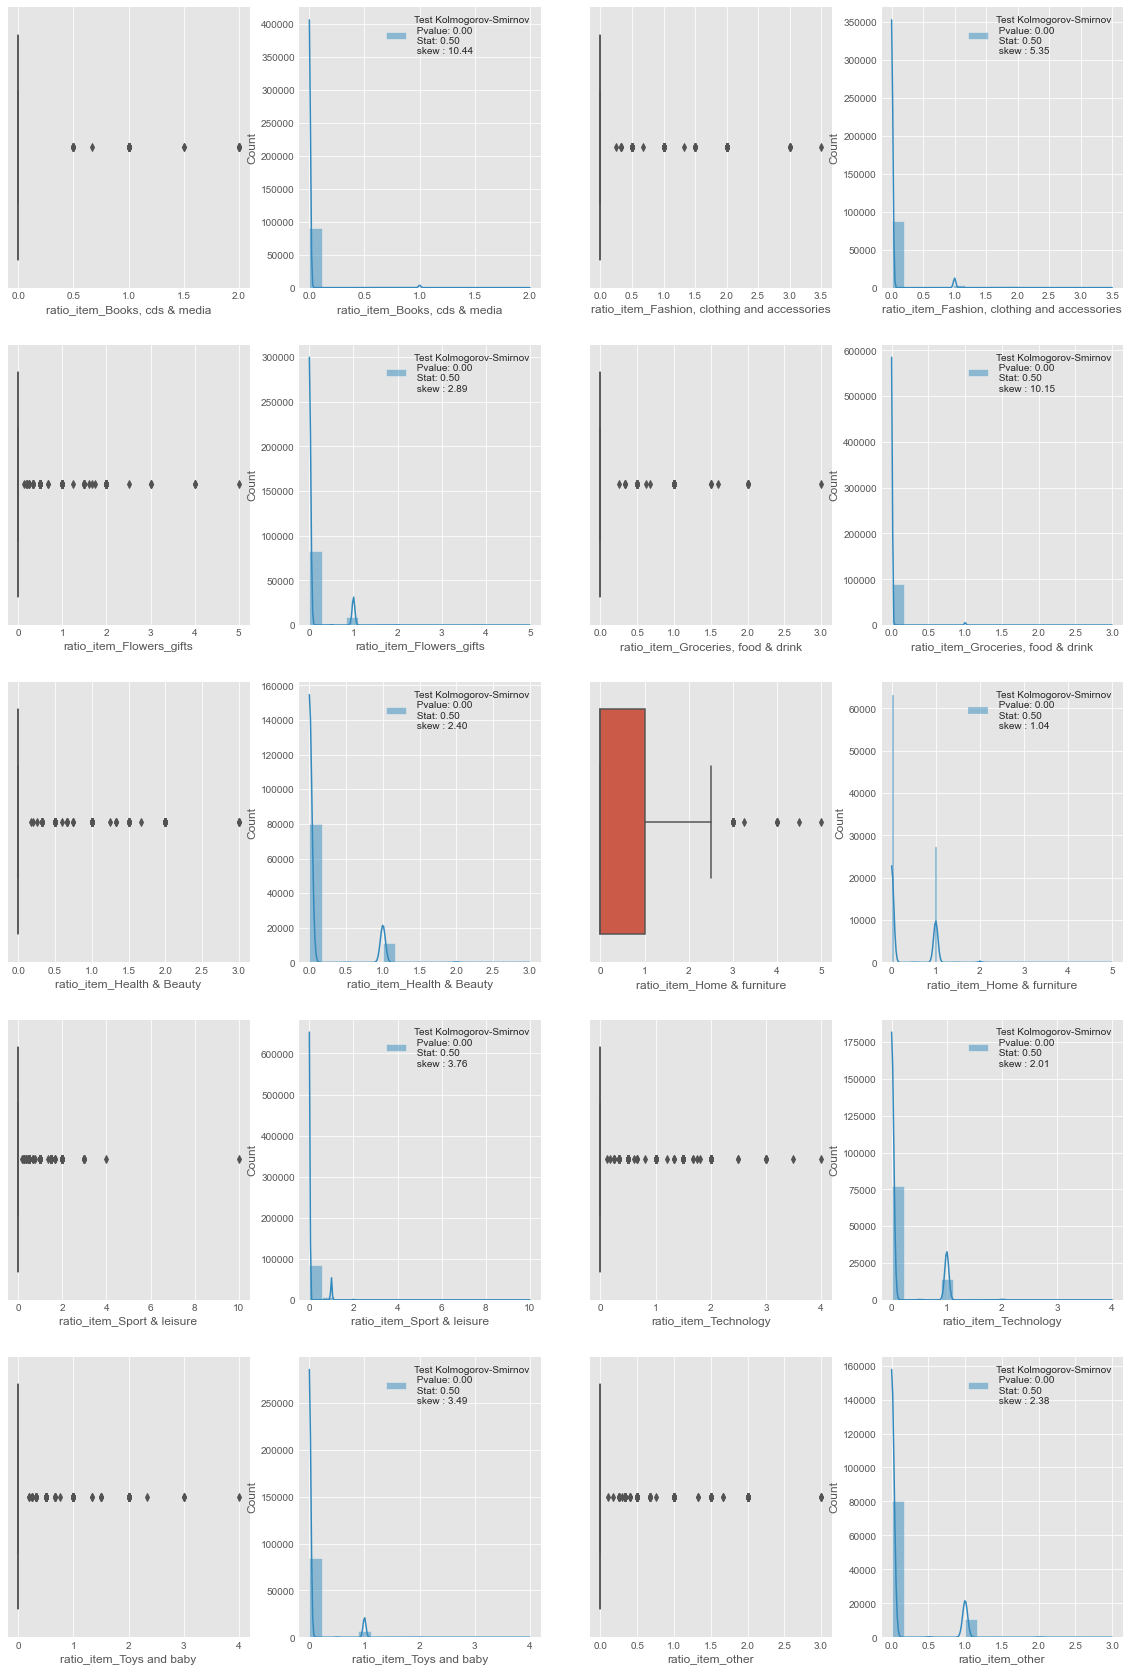

In [74]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 30))
for i, label in enumerate(item_category_features):
    plt.subplot(5, 4, 2*i+1 )
    sns.boxplot(final_df[label] )
    plt.subplot(5, 4, 2*i + 2)
    kstest = stats.kstest(final_df[label].dropna(), 'norm')
    skew = final_df[label].skew()
    sns.histplot(final_df[label],  kde = True,
                label='Test Kolmogorov-Smirnov \n Pvalue: {:.2f} \n Stat: {:.2f} \n skew : {:.2f}'.format(kstest.pvalue, kstest.statistic,skew))
    plt.legend()
plt.show()

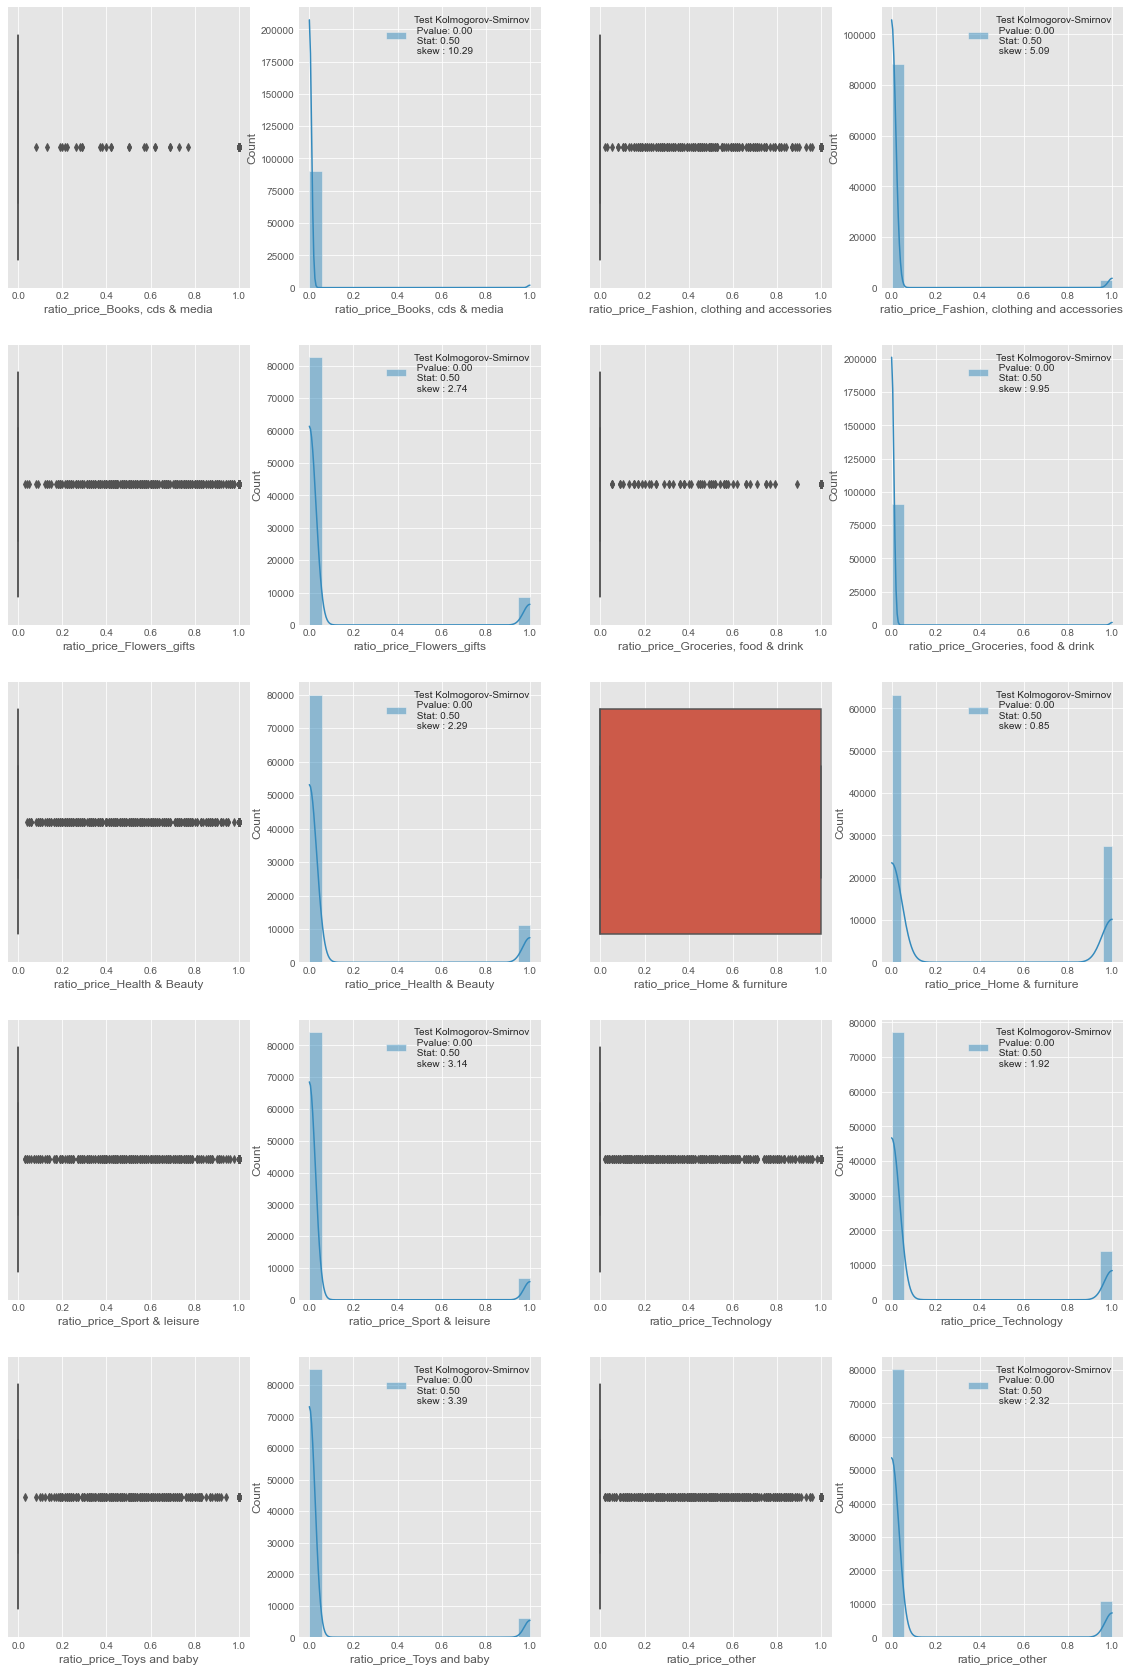

In [75]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 30))
for i, label in enumerate(price_category_features):
    plt.subplot(5, 4, 2*i+1 )
    sns.boxplot(final_df[label] )
    plt.subplot(5, 4, 2*i + 2)
    kstest = stats.kstest(final_df[label].dropna(), 'norm')
    skew = final_df[label].skew()
    sns.histplot(final_df[label],  kde = True,
                label='Test Kolmogorov-Smirnov \n Pvalue: {:.2f} \n Stat: {:.2f} \n skew : {:.2f}'.format(kstest.pvalue, kstest.statistic,skew))
    plt.legend()
plt.show()

## V- Pre-processing

## Outliers management

In [76]:
categ_df = final_df.select_dtypes(include="object")
print('Categorical features :\n-', '\n- '.join(categ_df.columns),'\n')
numeric_df = final_df.select_dtypes(include=["int64","float64"])
print('Numeric features :\n-', '\n- '.join(numeric_df.columns),'\n')

Categorical features :
- customer_unique_id 

Numeric features :
- total_orders
- total_item
- total_products_payment
- total_freight_payment
- total_turnover
- freight_ratio
- order_mean_item
- order_products_mean_price
- order_freight_mean_price
- order_mean_turnover
- item_mean_price
- mean_review_score
- order_mean_sequential_number
- order_mean_installement_number
- order_mean_delivery_delay(day)
- recency(day)
- mean_delay_between_orders
- ratio_price_Books, cds & media
- ratio_price_Fashion, clothing and accessories
- ratio_price_Flowers_gifts
- ratio_price_Groceries, food & drink
- ratio_price_Health & Beauty
- ratio_price_Home & furniture
- ratio_price_Sport & leisure
- ratio_price_Technology
- ratio_price_Toys and baby
- ratio_price_other
- ratio_item_Books, cds & media
- ratio_item_Fashion, clothing and accessories
- ratio_item_Flowers_gifts
- ratio_item_Groceries, food & drink
- ratio_item_Health & Beauty
- ratio_item_Home & furniture
- ratio_item_Sport & leisure
- ratio_it

In [77]:
final_df.dropna(inplace=True)

In [78]:
final_df

,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,total_turnover,freight_ratio,order_mean_item,order_products_mean_price,order_freight_mean_price,order_mean_turnover,item_mean_price,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,"ratio_item_Books, cds & media","ratio_item_Fashion, clothing and accessories",ratio_item_Flowers_gifts,"ratio_item_Groceries, food & drink",ratio_item_Health & Beauty,ratio_item_Home & furniture,ratio_item_Sport & leisure,ratio_item_Technology,ratio_item_Toys and baby,ratio_item_other,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,...,ratio_item_August,ratio_item_December,ratio_item_February,ratio_item_January,ratio_item_July,ratio_item_June,ratio_item_March,ratio_item_May,ratio_item_November,ratio_item_October,ratio_item_September,ratio_order_April,ratio_order_August,ratio_order_December,ratio_order_February,ratio_order_January,ratio_order_July,ratio_order_June,ratio_order_March,ratio_order_May,ratio_order_November,ratio_order_October,ratio_order_September,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,129.90,12.00,141.90,0.08,1.0,129.90,12.00,141.90,129.90,5.0,1.0,8.0,6.0,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,8.29,27.19,0.30,1.0,18.90,8.29,27.19,18.90,4.0,1.0,1.0,3.0,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0000f46a3911fa3c0805444483337064,1,1,69.00,17.22,86.22,0.20,1.0,69.00,17.22,86.22,69.00,3.0,1.0,8.0,26.0,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,25.99,17.63,43.62,0.40,1.0,25.99,17.63,43.62,25.99,4.0,1.0,4.0,20.0,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,16.89,196.89,0.09,1.0,180.00,16.89,196.89,180.00,5.0,1.0,6.0,13.0,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [79]:
final_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

In [80]:
#To display correlated features
corr_matrix = final_df.corr().abs()
high_corr_var=np.where(corr_matrix > 0.85)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y ]
high_corr_var

[('total_item', 'order_mean_item'),
 ('total_products_payment', 'total_turnover'),
 ('total_products_payment', 'order_products_mean_price'),
 ('total_products_payment', 'order_mean_turnover'),
 ('total_products_payment', 'item_mean_price'),
 ('total_freight_payment', 'order_freight_mean_price'),
 ('total_turnover', 'order_products_mean_price'),
 ('total_turnover', 'order_mean_turnover'),
 ('total_turnover', 'item_mean_price'),
 ('order_products_mean_price', 'order_mean_turnover'),
 ('order_products_mean_price', 'item_mean_price'),
 ('order_mean_turnover', 'item_mean_price'),
 ('ratio_price_Books, cds & media', 'ratio_item_Books, cds & media'),
 ('ratio_price_Fashion, clothing and accessories',
  'ratio_item_Fashion, clothing and accessories'),
 ('ratio_price_Flowers_gifts', 'ratio_item_Flowers_gifts'),
 ('ratio_price_Groceries, food & drink', 'ratio_item_Groceries, food & drink'),
 ('ratio_price_Health & Beauty', 'ratio_item_Health & Beauty'),
 ('ratio_price_Home & furniture', 'ratio_i

In [81]:
def remove_corr_var(X, feature_threshhold):
    """
    Remove correlated features that have high correlation with each other (keeping one)
    args: 
        X:
        feature_threshhold: 
    return: 
    """
       
    initial_feature = X.shape[1]
    corr = X.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) #getting upper traingle of correlation matrix
    column = [col for col in upper.columns if any(upper[col]>feature_threshhold)] #getting all columns that have high correlation with one of the features
    print("There are %i features that have high correlation with another feature with threshold being kept as %.3f and above. We will remove all of this."\
        %(len(column),feature_threshhold))
    print("Removing.........")
    X.drop(column,axis=1,inplace=True)
    print("The features were changed from %i to %i. %i features were removed."%(initial_feature,X.shape[1],initial_feature-X.shape[1]))
    return X

In [82]:
remove_corr_var(final_df, 0.85)

There are 40 features that have high correlation with another feature with threshold being kept as 0.850 and above. We will remove all of this.
Removing.........
The features were changed from 101 to 61. 40 features were removed.


,customer_unique_id,total_orders,total_item,total_products_payment,total_freight_payment,freight_ratio,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,129.90,12.00,0.08,5.0,1.0,8.0,6.0,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,18.90,8.29,0.30,4.0,1.0,1.0,3.0,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0000f46a3911fa3c0805444483337064,1,1,69.00,17.22,0.20,3.0,1.0,8.0,26.0,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,25.99,17.63,0.40,4.0,1.0,4.0,20.0,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,180.00,16.89,0.09,5.0,1.0,6.0,13.0,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,1,2,1570.00,497.42,0.24,5.0,1.0,10.0,28.0,447,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91477,fffea47cd6d3cc0a88bd621562a9d061,1,1,64.89,19.69,0.23,4.0,1.0,1.0,30.0,262,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91478,ffff371b4d645b6ecea244b27531430a,1,1,89.90,22.56,0.20,5.0,1.0,1.0,15.0,568,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91479,ffff5962728ec6157033ef9805bacc48,1,1,115.00,18.69,0.14,5.0,1.0,5.0,12.0,119,695.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
final_df.set_index ("customer_unique_id").to_csv ("customer segmentation olist.csv", index=False)

In [84]:
len(final_df[final_df['total_orders']>1])/len(final_df)

0.029593431941665846

### preprocessing